##Gathering Data

In [39]:
!kaggle datasets download -d yasserh/wine-quality-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
License(s): CC0-1.0
wine-quality-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
!unzip wine-quality-dataset.zip

Archive:  wine-quality-dataset.zip
  inflating: WineQT.csv              


## Import Semua Liblaries yang dibutuhkan

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Acsessing Data

In [41]:
df = pd.read_csv('WineQT.csv')

In [42]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Data Preparation

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [44]:

new_column_names = {
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'chlorides': 'chlorides',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide',
    'density': 'density',
    'pH': 'pH',
    'sulphates': 'sulphates',
    'alcohol': 'alcohol',
    'quality': 'quality',
    'Id': 'id'
}
df = df.rename(columns=new_column_names)

In [45]:
df.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


In [46]:
df.duplicated().sum()

0

In [47]:
df.drop(columns=['id'], inplace=True)

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

In [57]:
X = df.drop(columns=['quality'])
y = df['quality']


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## EDA

In [48]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


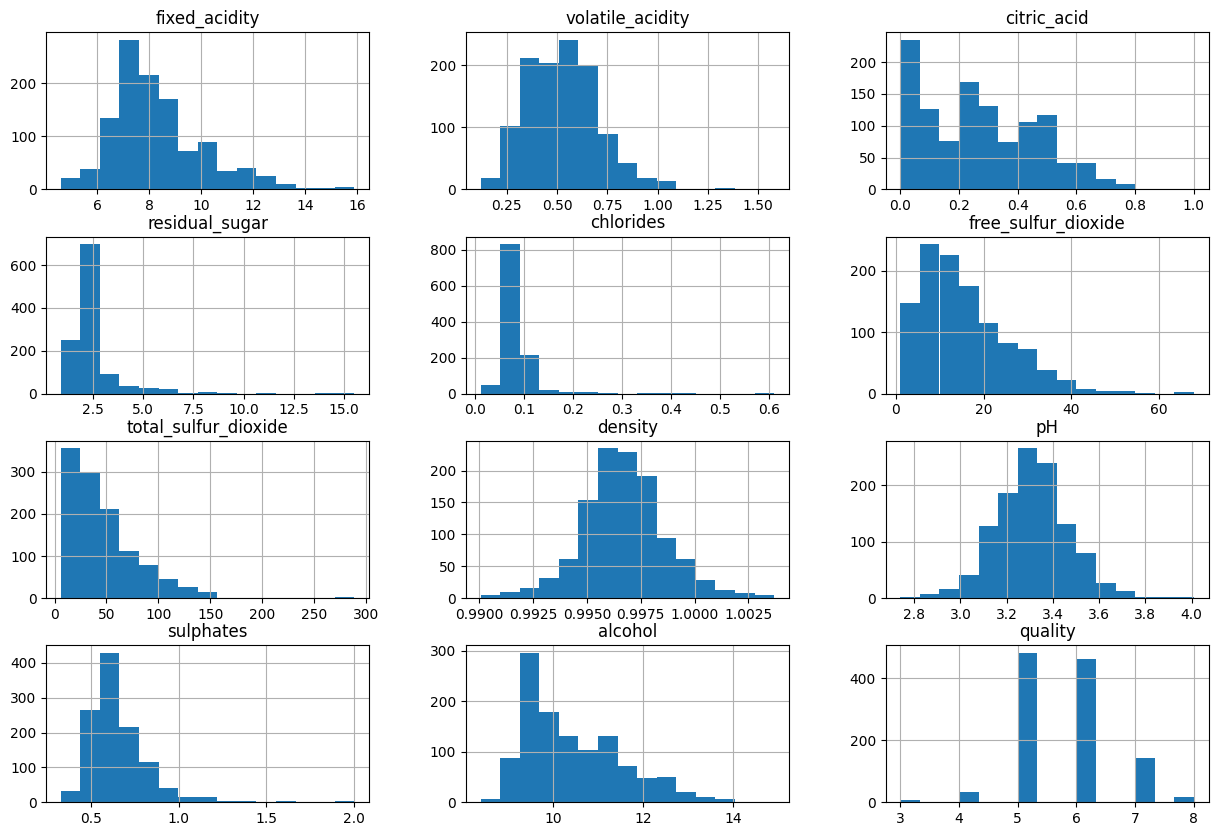

In [49]:
df.hist(bins=15, figsize=(15, 10))
plt.show()

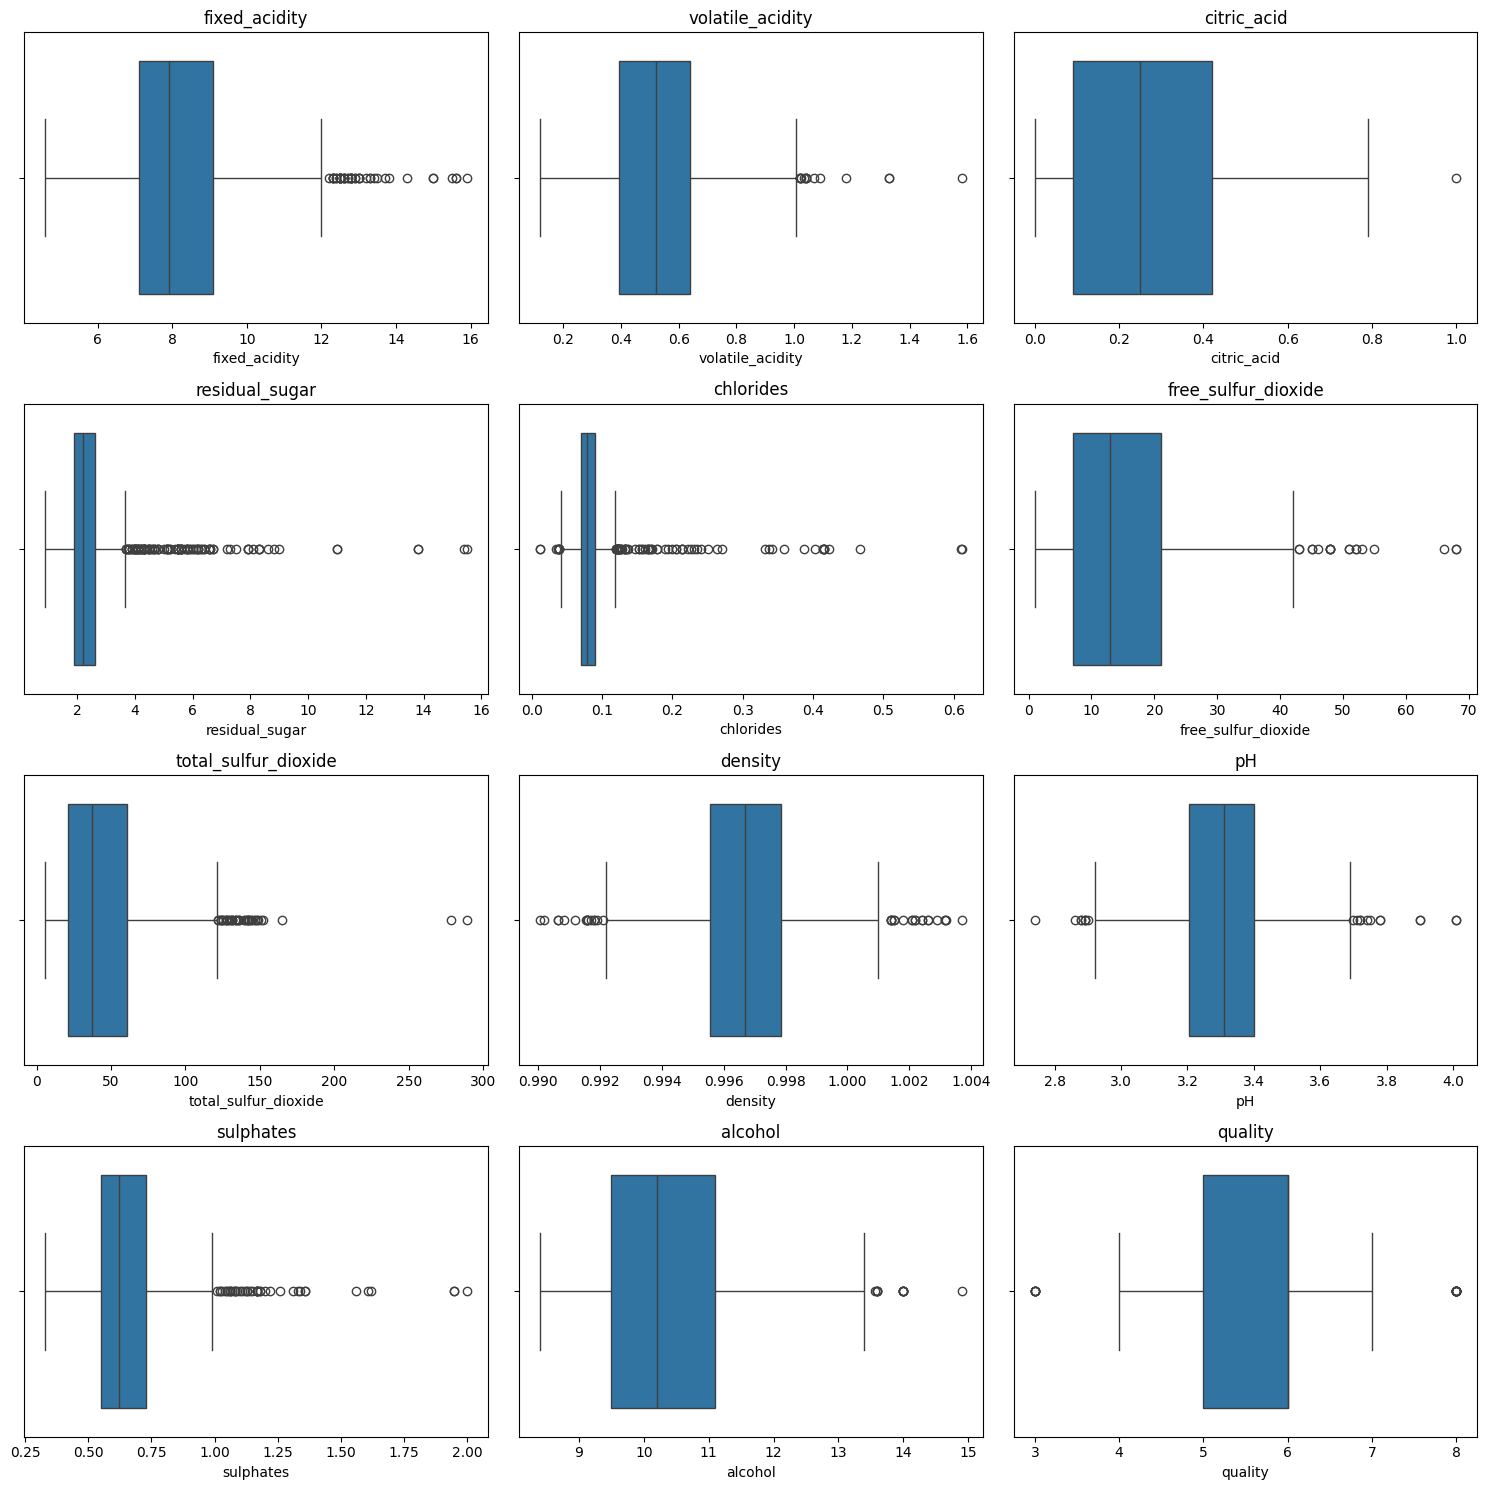

In [34]:
# prompt: boxplot 4 x 3

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the numerical columns and create boxplots
for i, column in enumerate(df.select_dtypes(include=np.number).columns):
  sns.boxplot(x=df[column], ax=axes[i])
  axes[i].set_title(column)

# Remove any unused subplots
for i in range(len(df.select_dtypes(include=np.number).columns), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [70]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
df.shape

(834, 12)

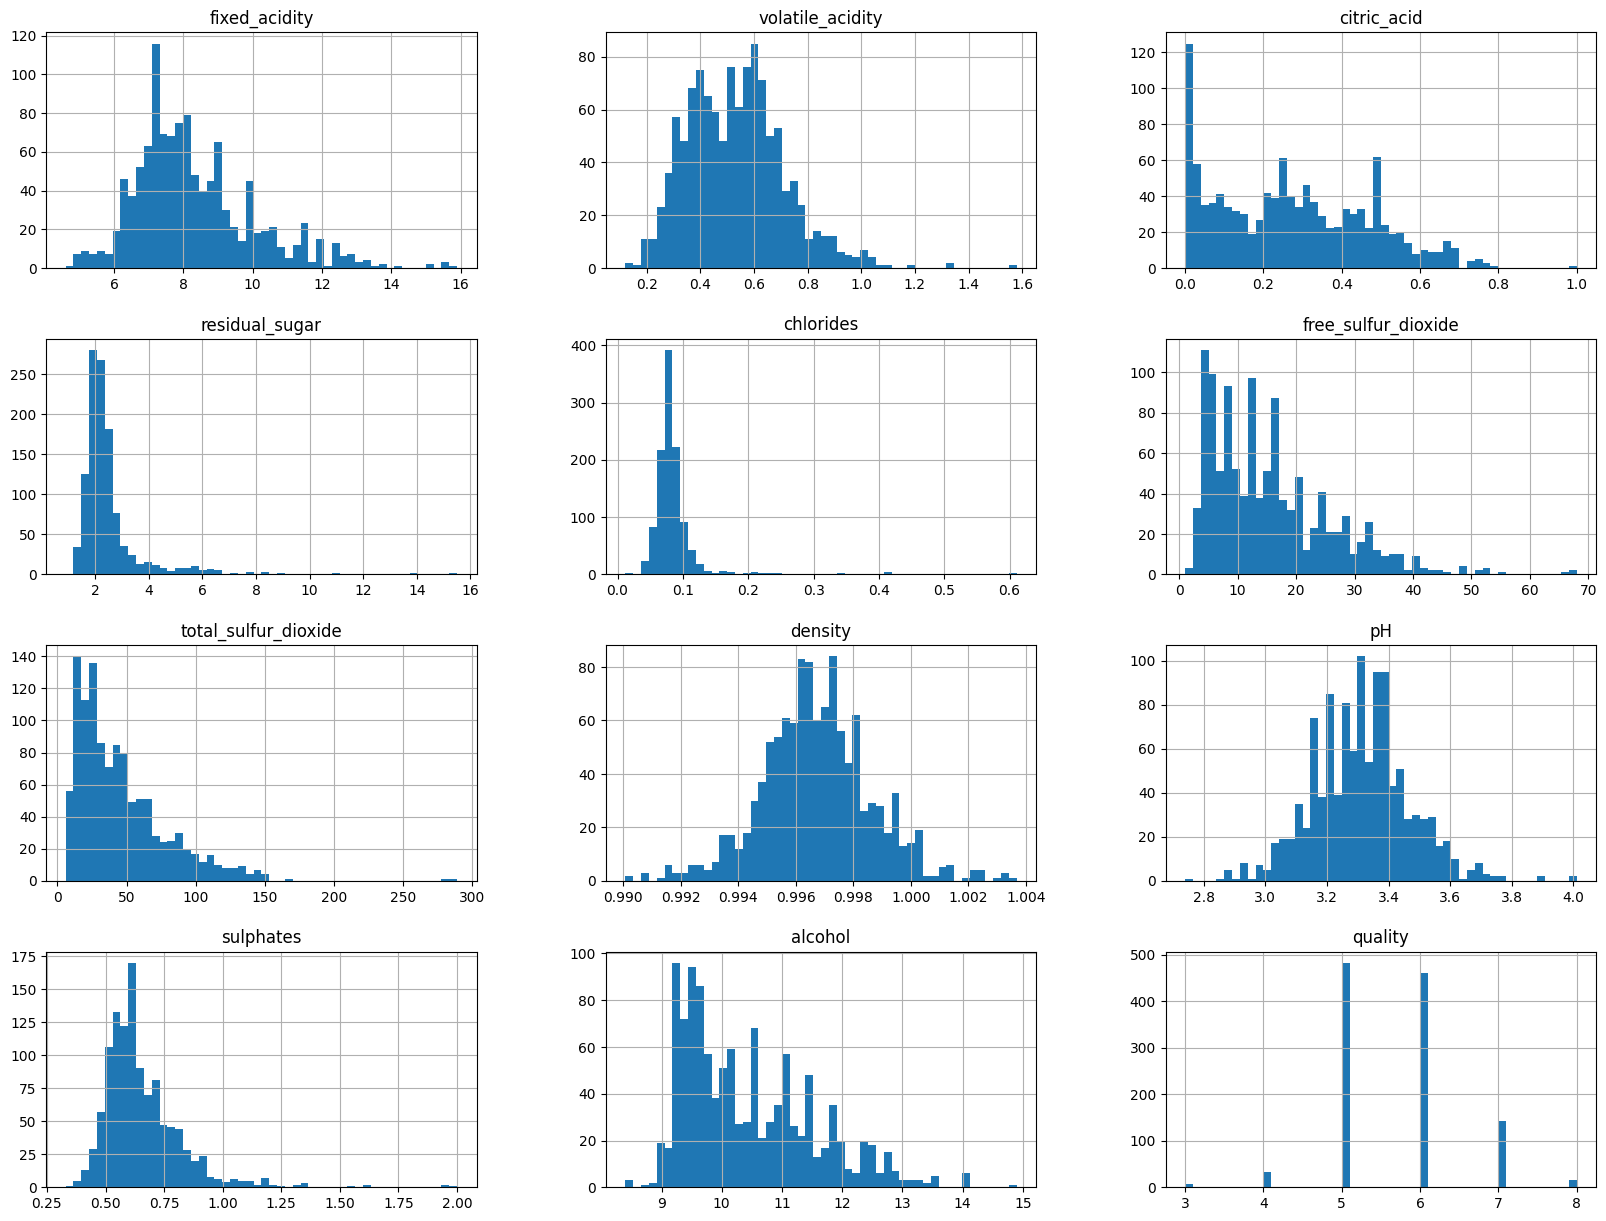

In [50]:
df.hist(bins=50, figsize=(20,15))
plt.show()

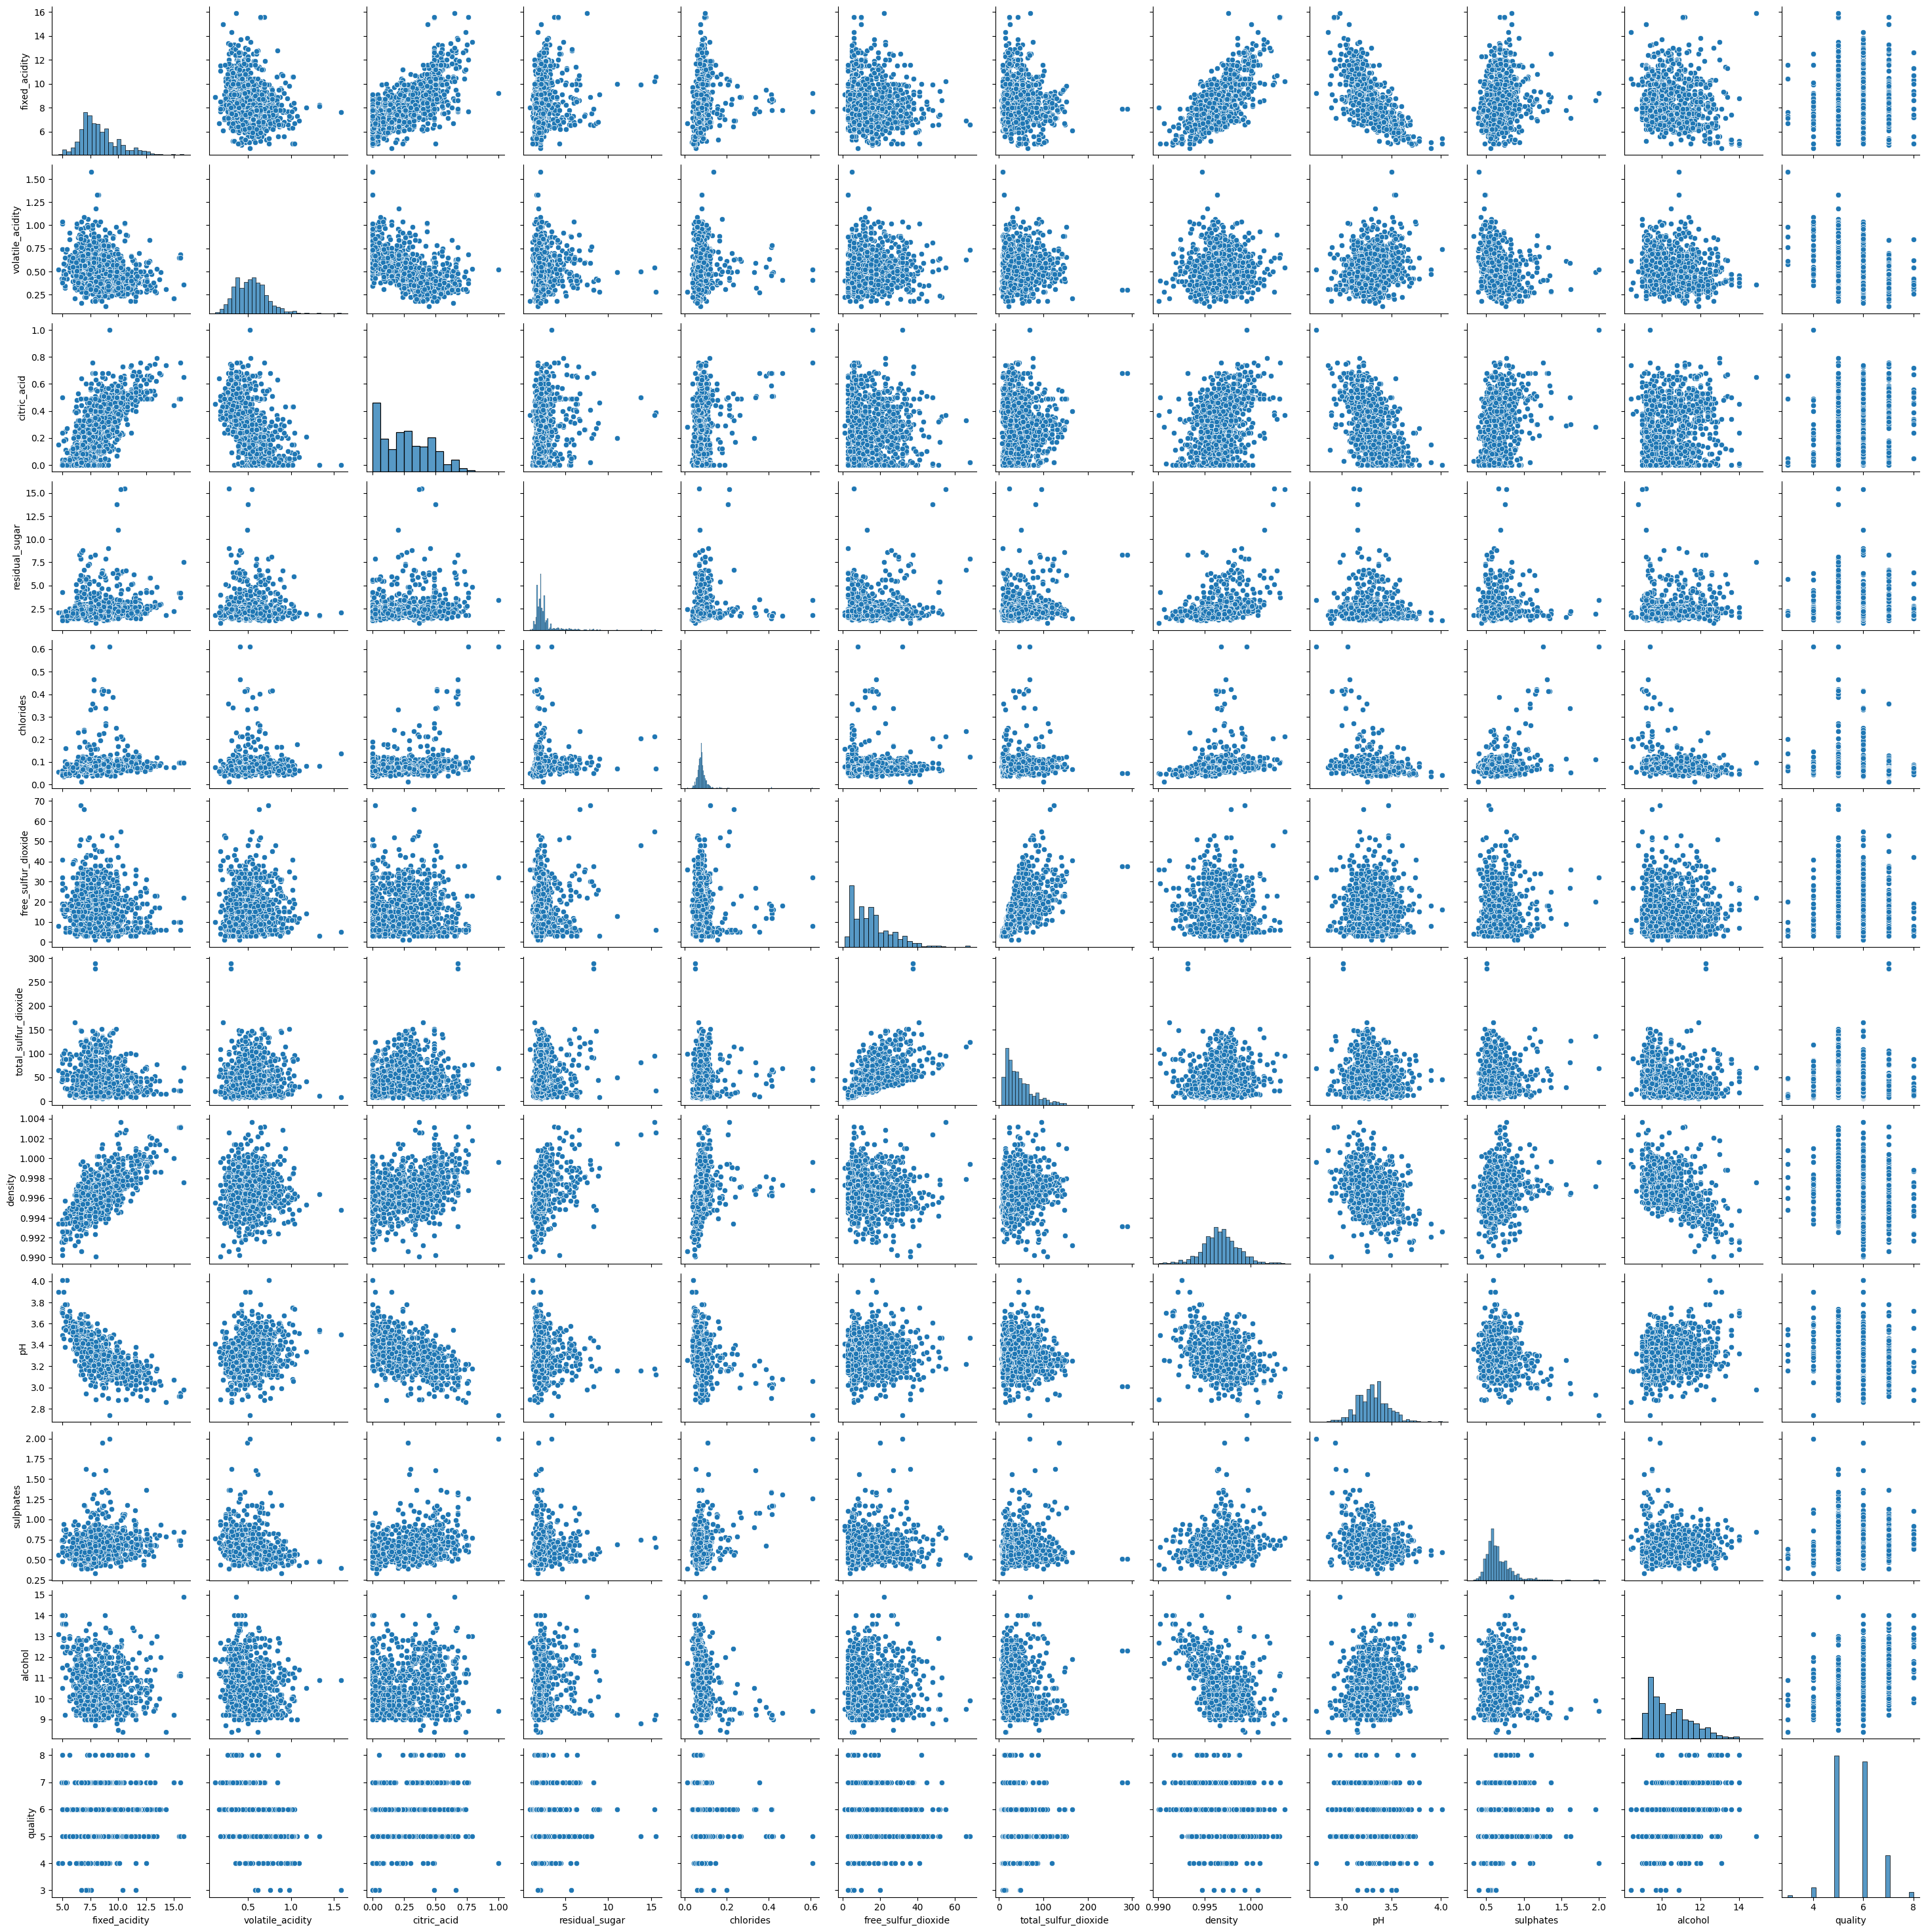

In [52]:
sns.pairplot(df)
plt.show()

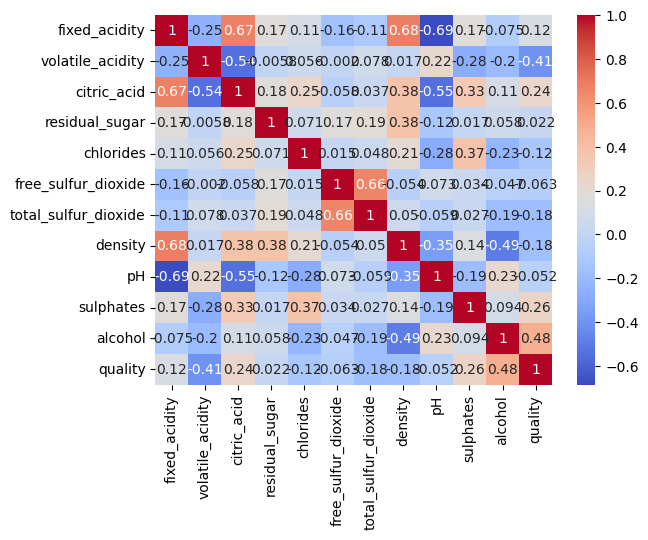

In [53]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Modelling

In [71]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [86]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [82]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.0002, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [85]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.000388,0.000387
RF,0.000057,0.000356
Boosting,0.000394,0.000388


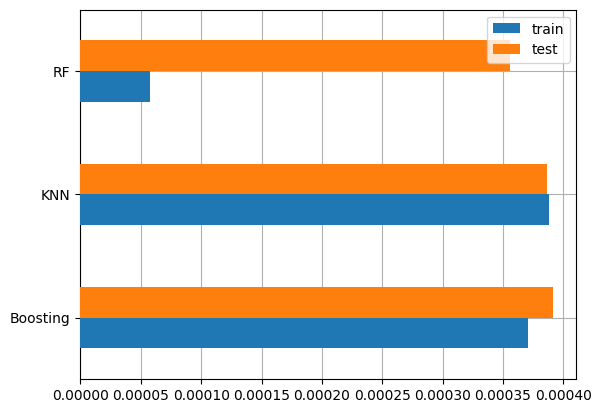

In [76]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [81]:
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
158,5,5.4,5.6,5.3
1081,6,5.3,5.6,5.3
291,5,5.1,5.5,5.5
538,6,5.3,5.2,5.3
367,6,5.7,6.2,6.5
